# Import

In [1]:
import os
import numpy as np
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

# Load the dataset

Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
_____________________________________________________________________________
Shape
(10000, 2)
_____________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
review       10000 non-null object
sentiment    10000 non-null object
dtypes: object(2)
memory usage: 156.4+ KB
None


,review,sentiment
count,10000,10000
unique,9983,2
top,Ik know it is impossible to keep all details o...,positive
freq,2,5028


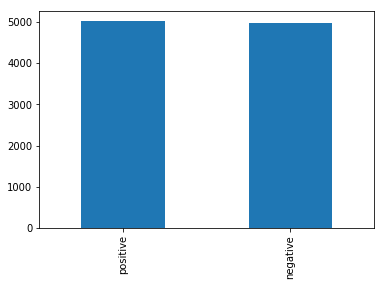

In [2]:
imdb_data=pd.read_csv('IMDBDataset.csv')

df_train=imdb_data[:10000]

print("Head")
print(df_train.head())
print("_____________________________________________________________________________")
print("Shape")
print(df_train.shape)
print("_____________________________________________________________________________")
print(df_train.info())

df_train['sentiment'].value_counts().plot(kind='bar');
df_train.describe()

The data is clean, there is no Naan values

# Preprocessing

## Tokenizing

Creation of a tokenize's function permitting to automatically tokenize our train and test set

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def tokenize(data):
    corpus = [word_tokenize(token) for token in data]
    lowercase_train = [[token.lower() for token in doc] for doc in corpus]
    alphas = [[token for token in doc if token.isalpha()] for doc in lowercase_train]
    stop_words = stopwords.words('english')
    train_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas]
    stemmer = PorterStemmer()
    stemmed = [[stemmer.stem(token) for token in doc] for doc in train_no_stop]
    train_clean_str = [ ' '.join(doc) for doc in stemmed]
    return train_clean_str

In [4]:
X_train=imdb_data.review[:4000]
y_train=imdb_data.sentiment[:4000]

X_train = tokenize(X_train)

X_test2=imdb_data.review[40000:45000]
y_test2=imdb_data.sentiment[40000:45000]

X_test2 = tokenize(X_test2)
y_test2 = y_test2.values.tolist()

X_train[1]

'wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

# Machine Learning

## Preprocessing

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

## Machine learning models

### MultinomialNB

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
pipe = Pipeline([('vectorizer', cvec), ('mnb', mnb)])

y_train=y_train.values.tolist()
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_pred, y_train)

cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_train, y_pred)
print(cm)
print("Accuracy :" , accuracy)
print(cr, cv)

[[1988   39]
 [ 176 1797]]
Accuracy : 0.94625
              precision    recall  f1-score   support

    negative       0.92      0.98      0.95      2027
    positive       0.98      0.91      0.94      1973

   micro avg       0.95      0.95      0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000
 0.8230473548741039


# Semi Supervised 

In [8]:
iterasi=1
acc_train=[]
acc_test=[]
acc_test2=[]

seed=1.10
data_total=len(X_train)
data_iter=int(seed*data_total)

In [9]:

print(data_total)
print(data_iter)


y_pred_fromtrain=pipe.predict(X_train)
cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_pred_fromtrain, y_train)
cm = confusion_matrix(y_train, y_pred_fromtrain)
accuracy = accuracy_score(y_pred_fromtrain, y_train)
acc_train.append(accuracy)
print("\nTrain Data=",len(X_train),len(y_train))
print("Predicton from train data model ke-",iterasi)
print("\nCross validation score:",cv,"\n",cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")


X_test=imdb_data.review[data_total:data_iter]
y_test=imdb_data.sentiment[data_total:data_iter]

pipe.fit(X_train,y_train)

print("Train Data=",len(X_train),len(y_train))
print("Test Data=",len(X_test),len(y_test))

y_test=y_test.values.tolist()
X_test=tokenize(X_test)
y_pred=pipe.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
acc_test.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





iterasi=iterasi+1


prob=pipe.predict_proba(X_test)

for data in range (0,len(X_test)) :

    if (prob[data][0]) > 0.999999 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('negative')
    if (prob[data][1]) > 0.999999 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('positive')
    elif (prob[data][0]) < 0.9 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('positive')
    elif (prob[data][1]) < 0.9 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('negative')
        
    

print(len(X_train),len(y_train))

data_total=data_iter
data_iter=int(seed*data_total)

4000
4400

Train Data= 4000 4000
Predicton from train data model ke- 1

Cross validation score: 0.8230473548741039 
               precision    recall  f1-score   support

    negative       0.98      0.92      0.95      2164
    positive       0.91      0.98      0.94      1836

   micro avg       0.95      0.95      0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000


Confusion Matrix : 
 [[1988   39]
 [ 176 1797]]
Accuracy : 0.94625
__________________________________________________________________________________________________
Train Data= 4000 4000
Test Data= 400 400
prediction from test data, model ke- 1
              precision    recall  f1-score   support

    negative       0.81      0.88      0.84       194
    positive       0.87      0.81      0.84       206

   micro avg       0.84      0.84      0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84    

In [10]:
while data_total < 10000 :

    print(data_total,data_iter,len(X_train))


    y_pred_fromtrain=pipe.predict(X_train)
    cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
    cr = classification_report(y_pred_fromtrain, y_train)
    cm = confusion_matrix(y_train, y_pred_fromtrain)
    accuracy = accuracy_score(y_pred_fromtrain, y_train)
    acc_train.append(accuracy)
    print("\nTrain Data=",len(X_train),len(y_train))
    print("Predicton from train data model ke-",iterasi)
    print("\nCross validation score:",cv,"\n",cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")


    X_test=imdb_data.review[data_total:data_iter]
    y_test=imdb_data.sentiment[data_total:data_iter]

    pipe.fit(X_train,y_train)

    print("Train Data=",len(X_train),len(y_train))
    print("Test Data=",len(X_test),len(y_test))

    y_test=y_test.values.tolist()
    X_test=tokenize(X_test)
    y_pred=pipe.predict(X_test)

    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_pred, y_test)
    acc_test.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")
    
    y_pred_fromtest2=pipe.predict(X_test2)
    cr = classification_report(y_test2, y_pred_fromtest2)
    cm = confusion_matrix(y_test2, y_pred_fromtest2)
    accuracy = accuracy_score(y_pred_fromtest2, y_test2)
    acc_test2.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")





    iterasi=iterasi+1


    prob=pipe.predict_proba(X_test)

    for data in range (0,len(X_test)) :
         if (data_total+data) < 10000:
                
                if (prob[data][0]) > 0.999999 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('negative')
                if (prob[data][1]) > 0.999999 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('positive')
                elif (prob[data][0]) < 0.9 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('positive')
                elif (prob[data][1]) < 0.9 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('negative')


            


    print(len(X_train),len(y_train))
    
    data_total=data_iter
    data_iter=int(seed*data_total)

4400 4840 4483

Train Data= 4483 4483
Predicton from train data model ke- 2

Cross validation score: 0.8339999683177837 
               precision    recall  f1-score   support

    negative       0.98      0.92      0.95      2457
    positive       0.91      0.98      0.94      2026

   micro avg       0.95      0.95      0.95      4483
   macro avg       0.95      0.95      0.95      4483
weighted avg       0.95      0.95      0.95      4483


Confusion Matrix : 
 [[2264   39]
 [ 193 1987]]
Accuracy : 0.9482489404416685
__________________________________________________________________________________________________
Train Data= 4483 4483
Test Data= 440 440
prediction from test data, model ke- 2
              precision    recall  f1-score   support

    negative       0.78      0.87      0.82       218
    positive       0.86      0.76      0.80       222

   micro avg       0.81      0.81      0.81       440
   macro avg       0.82      0.81      0.81       440
weighted avg       0.

prediction from test data, model ke- 6
              precision    recall  f1-score   support

    negative       0.78      0.82      0.80      2463
    positive       0.82      0.77      0.80      2537

   micro avg       0.80      0.80      0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000


Confusion Matrix : 
 [[2022  441]
 [ 571 1966]]
Accuracy : 0.7976
__________________________________________________________________________________________________
7765 7765
7085 7793 7765

Train Data= 7765 7765
Predicton from train data model ke- 7

Cross validation score: 0.8695668872909259 
               precision    recall  f1-score   support

    negative       0.97      0.92      0.94      4409
    positive       0.90      0.96      0.93      3356

   micro avg       0.94      0.94      0.94      7765
   macro avg       0.94      0.94      0.94      7765
weighted avg       0.94      0.94      0.94      7765


Confusio

In [14]:
print("Fnal Model")

pipe.fit(X_train,y_train)

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





len(X_train)

Fnal Model
prediction from test data, model ke- 11
              precision    recall  f1-score   support

    negative       0.77      0.80      0.78      2463
    positive       0.80      0.77      0.78      2537

   micro avg       0.78      0.78      0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000


Confusion Matrix : 
 [[1962  501]
 [ 582 1955]]
Accuracy : 0.7834
__________________________________________________________________________________________________


11327

# Test

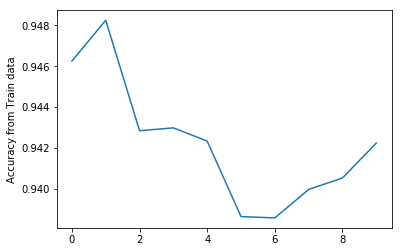

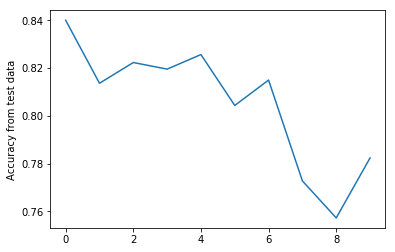

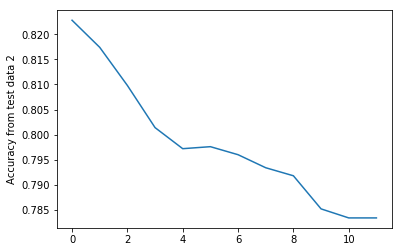

In [15]:
plt.plot(acc_train)
plt.ylabel('Accuracy from Train data')
plt.show()

plt.plot(acc_test)
plt.ylabel('Accuracy from test data')
plt.show()

plt.plot(acc_test2)
plt.ylabel('Accuracy from test data 2')
plt.show()

In [13]:
len(X_train)

11327